In [28]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import re


<module 'seaborn' from '/opt/conda/lib/python3.8/site-packages/seaborn/__init__.py'>

In [14]:
df_fifa = pd.read_csv("./data.csv")

In [15]:
df_fifa.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [16]:
df_fifa.columns= df_fifa.columns.str.lower()

In [17]:
df_fifa.head()

,unnamed: 0,id,name,age,photo,nationality,flag,overall,potential,club,...,composure,marking,standingtackle,slidingtackle,gkdiving,gkhandling,gkkicking,gkpositioning,gkreflexes,release clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [18]:
df_fifa.drop("unnamed: 0", axis=1, inplace=True)

In [19]:
df_fifa.head()

,id,name,age,photo,nationality,flag,overall,potential,club,club logo,...,composure,marking,standingtackle,slidingtackle,gkdiving,gkhandling,gkkicking,gkpositioning,gkreflexes,release clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [20]:
df_fifa.columns


Index(['id', 'name', 'age', 'photo', 'nationality', 'flag', 'overall',
       'potential', 'club', 'club logo', 'value', 'wage', 'special',
       'preferred foot', 'international reputation', 'weak foot',
       'skill moves', 'work rate', 'body type', 'real face', 'position',
       'jersey number', 'joined', 'loaned from', 'contract valid until',
       'height', 'weight', 'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw',
       'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm',
       'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'crossing',
       'finishing', 'headingaccuracy', 'shortpassing', 'volleys', 'dribbling',
       'curve', 'fkaccuracy', 'longpassing', 'ballcontrol', 'acceleration',
       'sprintspeed', 'agility', 'reactions', 'balance', 'shotpower',
       'jumping', 'stamina', 'strength', 'longshots', 'aggression',
       'interceptions', 'positioning', 'vision', 'penalties', 'composure',
       'marking', 'standingtackle', 'slidingtackle', 'gkdiv

In [21]:
df_fifa["wage"].head()

0    €565K
1    €405K
2    €290K
3    €260K
4    €355K
Name: wage, dtype: object

In [22]:
df_fifa["wage"] = df_fifa.wage.str.replace("€","")
df_fifa["wage"] = df_fifa["wage"].str.replace("K","").astype("float")
df_fifa["wage"].head() 


0    565.0
1    405.0
2    290.0
3    260.0
4    355.0
Name: wage, dtype: float64

In [24]:
df_fifa["wage"].dtypes

dtype('float64')

In [25]:
df_fifa["preferred foot"].value_counts()

Right    13948
Left      4211
Name: preferred foot, dtype: int64

In [30]:
counts_preferred_foot = df_fifa["preferred foot"].value_counts()
counts_preferred_foot = counts_preferred_foot.reset_index()
counts_preferred_foot.columns = ["preferred foot","Count"]
print(counts_preferred_foot)

  preferred foot  Count
0          Right  13948
1           Left   4211


## ด

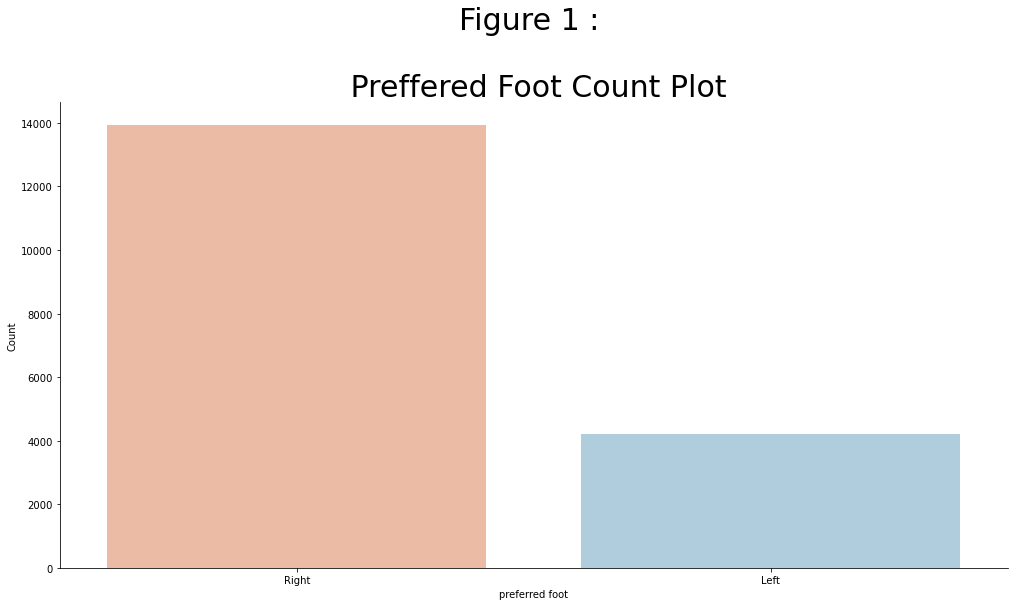

In [35]:
pt = sns.catplot(y="Count",
            x="preferred foot", data=counts_preferred_foot,
           palette="RdBu",height=7, aspect=2, kind="bar");
plt.title("Figure 1 : \n\n Preffered Foot Count Plot",
          fontsize=30);
